In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.rcParams['font.family'] = 'Helvetica'


sns.set(style="ticks", context='poster')
%matplotlib inline

# How to run the ssEcoGT model?

In [2]:
from ssEcoGT import *

In [7]:
J_to_A = 0.003 # Juvenile to Adult transition rate
A_to_D = 0.005 # Adult to Death transition rate
pred_rate = 0.05 # predation rate
rA = 0.02 # Adult reproduction rate species A
rB = 0.02 # Adult reproduction rate species B
mf_prob = {"A": 1, "B": 1} # Probability of an adult being predator for species A and B
int_dict = {'A': 0.5, 'B': 0.5} # Species interaction parameters
max_time = 10000 # Maximum simulation time
rewiring_rate = 0 # Rewiring rate for dynamic graphs
ER = 0.1 # Erdos-Renyi graph connection probability, if 0, a complete graph is generated


sim = SC_on_graph(J_to_A=J_to_A, A_to_D=A_to_D, eta=pred_rate, rA=rA, rB=rB, mf=mf_prob, alpha=int_dict, N=50, n=50, max_time=max_time, path='./', rewiring_rate=rewiring_rate, ER=ER)

In [13]:
%ls 

ER_0.1_JtoA_0.003_AtoD_0.005_pred_0.05_rA_0.02_rB_0.02_mfA_1_mfB_1_alphaA_0.5_alphaB_0.5_N_50_n_50_t_10000_r_0/
README.md
__pycache__/
demo.ipynb
ssEcoGT.py


In [16]:
files = list(Path("ER_0.1_JtoA_0.003_AtoD_0.005_pred_0.05_rA_0.02_rB_0.02_mfA_1_mfB_1_alphaA_0.5_alphaB_0.5_N_50_n_50_t_10000_r_0").glob("sim_results_*.csv"))
df = pd.read_csv(files[0])

In [17]:
df.head()

,Time,JA,AA,DA,KA,JB,AB,DB,KB,Rewiring,Predation_AB,Predation_BA,MaturationA,MaturationB,ReproductionA,ReproductionB,DeathA,DeathB
0,0.000000,25,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0
1,4.190816,24,1,0,0,25,0,0,0,0,0,0,1,0,0,0,0,0
2,18.863973,23,2,0,0,25,0,0,0,0,0,0,1,0,0,0,0,0
3,25.954463,23,2,0,0,24,1,0,0,0,0,0,0,1,0,0,0,0
4,28.168251,23,1,1,0,24,1,0,0,0,0,0,0,0,0,0,1,0


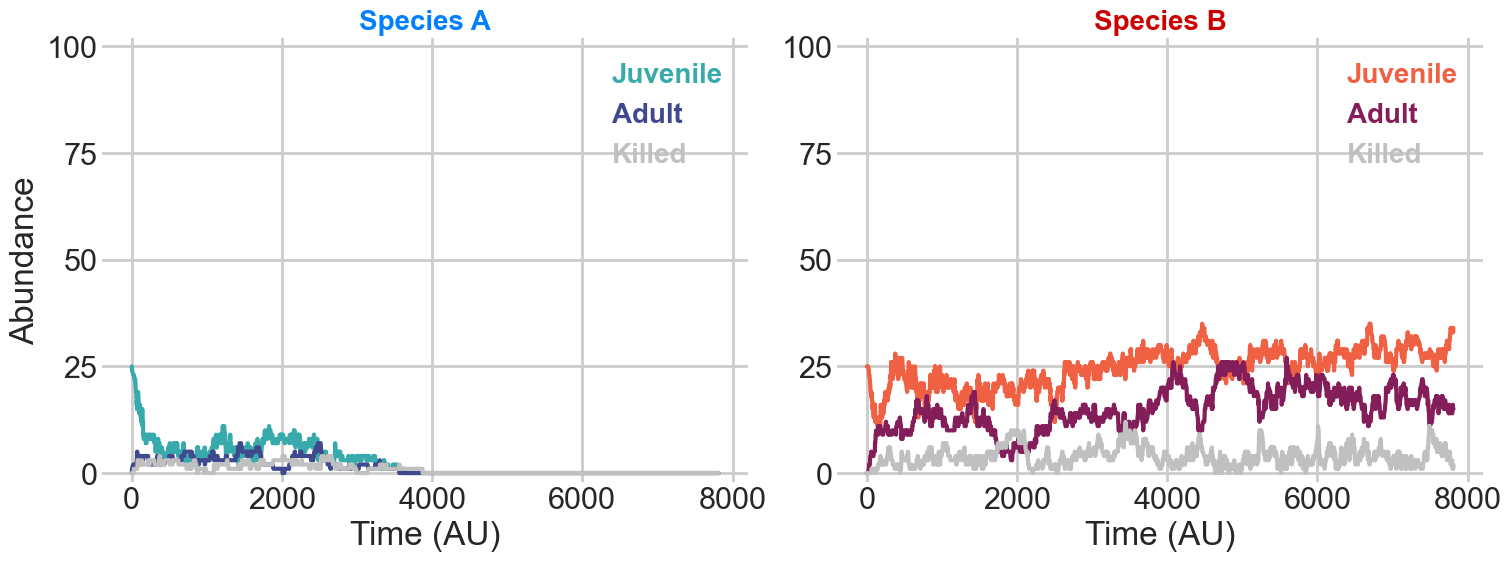

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,5.5),constrained_layout=True)

axes = axes.flatten()

col_palette1 = sns.color_palette("mako_r", n_colors=2)
col_palette2 = sns.color_palette("rocket_r", n_colors=2)

# col_palette = sns.color_palette("mako_r", n_colors=2)

axes[0].plot(df['Time'], df['JA'], label='Juvenile', color=col_palette1[0])
axes[0].plot(df['Time'], df['AA'], label='Adult', color=col_palette1[1])
# axes[0].plot(df['Time'], df['KA'], label='Killed', color='gray')
axes[0].plot(df['Time'], df['DA'], label='Dead', color='silver')


custom_lines = [
    plt.Line2D([0], [0], color=col_palette1[0], lw=2, label='Juvenile'),
    plt.Line2D([0], [0], color=col_palette1[1], lw=2, label='Adult'),
    plt.Line2D([0], [0], color='silver', lw=2, label='Killed'),
    # plt.Line2D([0], [0], color='silver', lw=2, label='Died')
]

lg = axes[0].legend(handles=custom_lines, loc='best', frameon=False, markerscale=0, handlelength=0, handleheight=0.1, labelcolor='linecolor', prop={'weight':'heavy', 'size':'small'})


axes[1].plot(df['Time'], df['JB'], color=col_palette2[0])
axes[1].plot(df['Time'], df['AB'],  color=col_palette2[1])
# axes[1].plot(df['Time'], df['KB'],  color='gray')
axes[1].plot(df['Time'], df['DB'],  color='silver')


custom_lines = [
    plt.Line2D([0], [0], color=col_palette2[0], lw=2, label='Juvenile'),
    plt.Line2D([0], [0], color=col_palette2[1], lw=2, label='Adult'),
    plt.Line2D([0], [0], color='silver', lw=2, label='Killed'),
    # plt.Line2D([0], [0], color='silver', lw=2, label='Died')
]

lg = axes[1].legend(handles=custom_lines, loc='best', frameon=False, markerscale=0, handlelength=0, handleheight=0.1, labelcolor='linecolor', prop={'weight':'heavy', 'size':'small'})


for ax in axes:
    ax.grid(True)
    ax.set(xlabel='Time (AU)', ylabel='Abundance')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(which='both', length=0)
    ax.set_yticks(np.linspace(0, 100, 5))
    ax.set_ylim(-2, 102)

axes[1].set_ylabel('')

axes[0].set_title('Species A', fontsize=20, fontdict={'weight':'bold', 'color':'#007FFF'})
axes[1].set_title('Species B', fontsize=20, fontdict={'weight':'bold', 'color':'#CC0000'})

plt.show();

In [19]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Wed Jan 14 2026

Python implementation: CPython
Python version       : 3.13.3
IPython version      : 9.2.0

numpy     : 2.2.5
networkx  : 3.4.2
matplotlib: 3.10.1
pandas    : 2.2.3
seaborn   : 0.13.2

